In [1]:
import sys
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/')

from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation import ASAPP
from data._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from data import _sim 
from scipy import stats
from sklearn.metrics import mean_squared_error as mse


experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

dl = DataSet()
dl.config = args
dl.initialize_path()
dl.initialize_data()
# dl.load_data()
print(dl.inpath)
print(dl.outpath)
# logging.basicConfig(filename=dl.outpath+'_model.log',
# 						format='%(asctime)s %(levelname)-8s %(message)s',
# 						level=logging.INFO,
# 						datefmt='%Y-%m-%d %H:%M:%S')

# asap = ASAPP(adata=dl,tree_min_leaf=5,tree_max_depth=1000, factorization='MVB',max_iter=10,n_pass=10)
# asap.factorize()
# asap.save_model()

/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/hbcc/hbcc
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/hbcc/hbcc


In [2]:
fn = dl.outpath
df_d = pd.read_csv(fn+'_model_depth.csv.gz')
df_f = pd.read_csv(fn+'_model_freq.csv.gz')
df_beta = pd.read_csv(fn+'_model_beta.csv.gz')
df_theta = pd.read_csv(fn+'_model_theta.csv.gz')
df_theta = df_theta.rename(columns={'Unnamed: 0':'cell'})
df_beta = df_beta.rename(columns={'Unnamed: 0':'topic'})
df_trace= pd.read_csv(fn+'_model_bulk_trace.csv.gz')



In [7]:
df_theta.head()

,cell,0,1,2,3,4,5,6,7,8,9
0,CID3586_AAGACCTCAGCATGAG,0.010504,0.008460,0.032719,0.073143,0.014154,0.038400,0.043213,0.079065,0.097058,0.063026
1,CID3586_AAGGTTCGTAGTACCT,0.010537,0.008762,0.039614,0.114533,0.012392,0.026669,0.039602,0.057849,0.097586,0.068716
2,CID3586_ACCAGTAGTTGTGGCC,0.009457,0.006669,0.031642,0.097018,0.012045,0.025953,0.051115,0.057959,0.109253,0.055730
3,CID3586_ACCCACTAGATGTCGG,0.013291,0.008358,0.029412,0.111823,0.012734,0.031837,0.047415,0.067771,0.094124,0.073190
4,CID3586_ACTGATGGTCAACTGT,0.010461,0.010241,0.041197,0.093629,0.013827,0.019419,0.066868,0.059914,0.106895,0.045281


In [4]:
df_trace.shape

(50, 2)

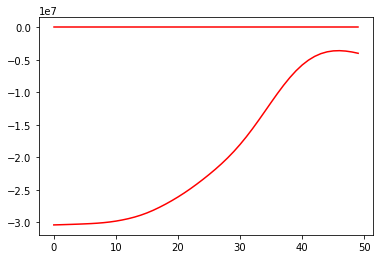

In [3]:
plt.plot(df_trace,'r')

In [5]:
df_pl = pd.read_csv(fn+'_prior_label.csv.gz')
df_pl.columns = ['cell','cell_type']
df_pl

,cell,cell_type
0,CID3586_AAGACCTCAGCATGAG,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,Endothelial
3,CID3586_ACCCACTAGATGTCGG,Endothelial
4,CID3586_ACTGATGGTCAACTGT,Endothelial
...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,Myeloid


In [8]:
import umap

df_umap= pd.DataFrame()
df_umap['cell'] = df_theta['cell']
df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
proj_2d = umap_2d.fit(df_theta.iloc[:,1:])
df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
df_umap

# df_umap = pd.read_csv(sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id+'_sc_umap.csv')
# df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
# df_umap['topic_sc'] = [x for x in df_sctheta.iloc[:,1:].idxmax(axis=1)]
# df_umap['topic_bulk'] = [x for x in df_btheta.iloc[:,1:].idxmax(axis=1)]

# df_umap

,cell,topic,umap1,umap2
0,CID3586_AAGACCTCAGCATGAG,8,12.207177,6.157012
1,CID3586_AAGGTTCGTAGTACCT,3,12.090997,6.519682
2,CID3586_ACCAGTAGTTGTGGCC,8,12.245830,6.239715
3,CID3586_ACCCACTAGATGTCGG,3,12.108708,6.473768
4,CID3586_ACTGATGGTCAACTGT,8,12.237328,6.226039
...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,1,-3.666159,8.805696
100060,CID4398_TCTATTGTCGCCATAA,3,3.674428,3.286019
100061,CID4398_TCTTTCCCAGTAAGCG,3,7.956865,11.555637
100062,CID4398_TGCCCATGTTACGGAG,3,3.400468,3.330401


In [9]:
df_umap = pd.merge(df_umap,df_pl[['cell','cell_type']],on='cell',how='left')
df_umap = df_umap[~df_umap['cell_type'].isna()]
df_umap

,cell,topic,umap1,umap2,cell_type
0,CID3586_AAGACCTCAGCATGAG,8,12.207177,6.157012,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,3,12.090997,6.519682,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,8,12.245830,6.239715,Endothelial
3,CID3586_ACCCACTAGATGTCGG,3,12.108708,6.473768,Endothelial
4,CID3586_ACTGATGGTCAACTGT,8,12.237328,6.226039,Endothelial
...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,1,-3.666159,8.805696,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,3,3.674428,3.286019,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,3,7.956865,11.555637,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,3,3.400468,3.330401,Myeloid


In [10]:
df_umap.cell_type.value_counts()

T-cells              35214
Cancer Epithelial    24489
Myeloid               9675
Endothelial           7605
CAFs                  6573
PVL                   5423
Normal Epithelial     4355
Plasmablasts          3524
B-cells               3206
Name: cell_type, dtype: int64

Text(0.5, 1.0, 'scNMF')

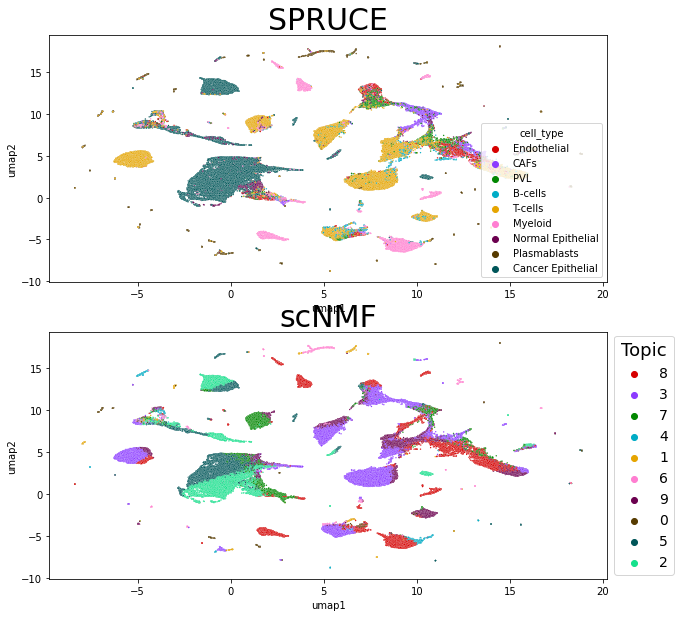

In [18]:
plt.rcParams["figure.figsize"] = (10,10)
figure,axis = plt.subplots(2,1)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True,ax=axis[0])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("SPRUCE",fontsize=30)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic',s=2,palette=cp,legend=True,ax=axis[1])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("scNMF",fontsize=30)



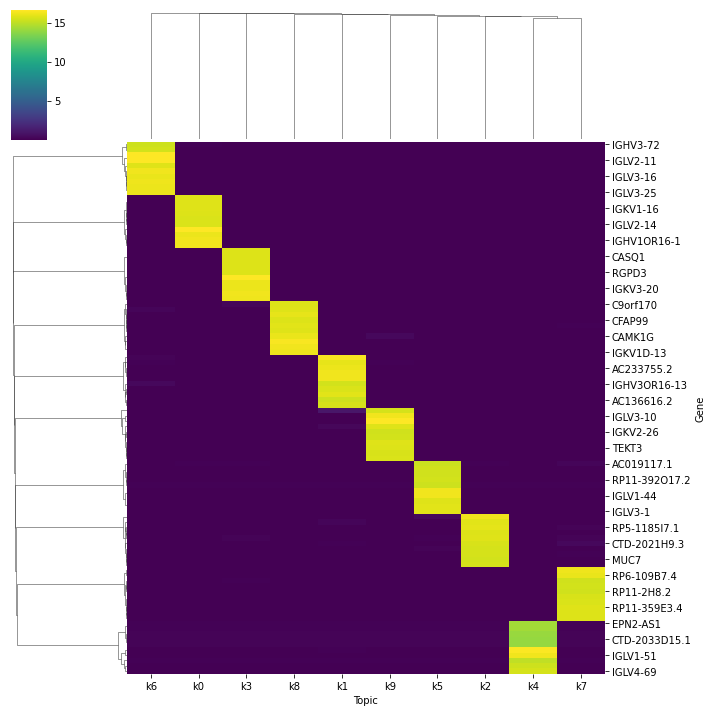

In [15]:
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,1:],top_n=10)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

Text(69.0, 0.5, 'cell_type')

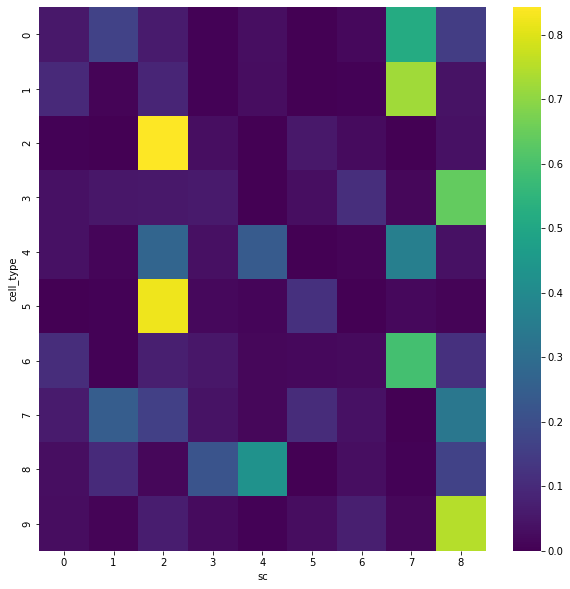

In [22]:
from sklearn.metrics.cluster import contingency_matrix
df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic,df_umap.cell_type))
# df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic_sc_ct,df_umap.topic_blk_ct))
df_rmatch = df_rmatch.div(df_rmatch.sum(axis=1), axis=0)
sns.heatmap(df_rmatch,cmap='viridis')
plt.xlabel('sc')
plt.ylabel('cell_type')


In [24]:
df_grp = df_umap.groupby(['topic','cell_type'])['cell_type'].size().rename('count').reset_index()
celltype_sum = dict(df_grp.groupby('topic')['count'].sum())
df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic'])]
df_grp['topic'] =  df_grp['topic'].astype(int)
df_grp
df_grp.to_csv(fn+'_r1_topic_sc_ct_dist.csv.gz',index=False, compression='gzip')

# df_grp = df_umap.groupby(['topic_bulk','cell_type'])['cell_type'].size().rename('count').reset_index()
# celltype_sum = dict(df_grp.groupby('topic_bulk')['count'].sum())
# df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic_bulk'])]
# df_grp = df_grp.rename(columns={'topic_bulk':'topic'})
# df_grp['topic'] =  df_grp['topic'].astype(int)

# bulk_to_sc={
# 0:4,
# 1:2,
# 2:8,
# 3:3,
# 4:7,
# 5:6,
# 6:0,
# 7:9,
# 8:1,
# 9:5
# }

# df_grp['topic'] = [bulk_to_sc[x] for x in df_grp['topic']]
# df_grp.to_csv(fn+'_r1_topic_bulk_ct_dist.csv.gz',index=False, compression='gzip')


In [50]:
df_grp

,topic,cell_type,count,ncount
0,0,B-cells,79,0.008236
1,0,CAFs,21,0.002189
2,0,Cancer Epithelial,39,0.004066
3,0,Endothelial,25,0.002606
4,0,Myeloid,8736,0.910759
...,...,...,...,...
82,9,Myeloid,734,0.024423
83,9,Normal Epithelial,1716,0.057097
84,9,PVL,6,0.000200
85,9,Plasmablasts,600,0.019964
